# Network Theory and Brain Imaging 2020: Workshop (python)

In this workshop, the idea is for you to get a feel with some network software,
see how to process the network objects and how to analyze and plot networks.

This notebook goes through some of the core concepts from the lectures.
On canvas.ki.se, there will be some tasks for you to do after you have read this notebook.
Feel free to experiment in the notebook to understand what different functions do. 

Before starting you are going to want to install networkx, matplotlib, pandas and python-louvain.
It is strongly recommended that you use python 3 and anaconda.  

```
pip install networkx
pip install matplotlib
pip install pandas
pip install python-louvain
```

## Let's begin

We start by importing the necessary libraries that we will need: 

In [1]:
import numpy as np
import networkx as nx
# For plotting
import matplotlib.pyplot as plt
# Optional for network analyses used to collect results
import pandas as pd
# This is python-louvain
import community


# Creating the first network

To create an empty network simply type: 


In [2]:
# Create an empty network
network1 = nx.Graph() 


This means that a network object is now stored as `network1`.
The network that is created is undirected.
If you want to create a directed network, use `nx.DiGraph()`.

We can check that network1 is undirected by running:

In [3]:
network1.is_directed()


False

## Defining the nodes

We can add nodes with two functions.
The first funtion adds one node at a time: 

`network1.add_node(...)`

or multiple nodes with 

`network1.add_nodes_from(...)`

Nodes can be called names or numbers.
So we could type: 

`network1.add_node('Ashley')`

And we would create a node that is always referenced as Ashley. 
Alternatively, we could type: 

`network1.add_node(0, label='Ashley')`

This creates a node called 0 with an attribute. 
The attribute is called "label", and the value is 'Ashley'. 

A node can also have multiple attributes, and you are free to name them, e.g.

`network1.add_node(0, label='Ashley', short_label='A', opinion=1)`

In this tutorial, we will use numbers (starting from 0) to name the nodes,
and give attributes as the names of the node.

We will now run the following code to create a network with 6 nodes
using `add_nodes_from()`. 

When adding an attributes here, it must be of the form: 

`[(node_name1, {attribute_name: arrtibute1}), node_name2 ...]`

So the first few lines create this quickly: 


In [4]:
# Make a list of attribute names
labs = ['Ashley', 'Blake', 'Casey', 'Dylon', 'Elliot', 'Finley']
# create [(node_name1, {attribute_name: arrtibute1}), ...] form as above
# Slightly advanced python warning, it is ok if you do not fully understand the next line
# Look at print(nodes_input) statement to see what this line creates.  
nodes_input = [(idx, {'label': lab})  for (idx, lab) in enumerate(labs)]
network1.add_nodes_from(nodes_input)
# Show the output.
# First to show what input_to_nodes_from looks like,
#  after that the output of network1.nodes and # network1.nodes[0]
print('--- nodes_input ---')
print(nodes_input)
print('--- network1.nodes ---')
print(network1.nodes)
print('--- network1.nodes[0] ---')
network1.nodes[0]


--- nodes_input ---
[(0, {'label': 'Ashley'}), (1, {'label': 'Blake'}), (2, {'label': 'Casey'}), (3, {'label': 'Dylon'}), (4, {'label': 'Elliot'}), (5, {'label': 'Finley'})]
--- network1.nodes ---
[0, 1, 2, 3, 4, 5]
--- network1.nodes[0] ---


{'label': 'Ashley'}

nodes_input is printed to show what the for loop created. If you did not understand the for loop, that is ok.
The main thing is that you understand the input to `add_nodes_from()`.

We see from network1.nodes that we have 6 nodes. 

Then we see we can query network1.nodes[node_name] to see the attributes of that node.

## Adding edges

Adding edges is a lot like adding nodes. 

(1) There are the functions `add_edge()` and `add_edges_from()`
(2) Attributes for edges can also be specified.

So to add an edge, we type:

`network1.add_edge(1, 2)`

To create an edge between node 1 and node 2. 

If we were using strings for our nodes:

`network1.add_edge('A', 'B')`

Will create an edge between node A and node B. 

There is a special attribute _weight_, for weighted networks. 
This attribute must be numeric.

`network1.add_edge(0, 1, weight=0.5)`

Will create an edge with a weight of 0.5

Now let us add 7 weighted edges to this network.


In [5]:
network1.add_edge(0, 1, weight=0.75)
network1.add_edge(0, 2, weight=1)
network1.add_edge(1, 2, weight=0.5)
network1.add_edge(2, 3, weight=1)
network1.add_edge(3, 4, weight=0.5)
network1.add_edge(3, 5, weight=1)
network1.add_edge(4, 5, weight=0.75)
network1.edges



EdgeView([(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (3, 5), (4, 5)])

We see that calling network1.edges shows a list of all the edges.

_Optional Assignment_: change the above and call `add_edge_from` instead (tip: look to how we called `add_node_from` above)

Like with the nodes, we can also see the attributes of specific edges:

In [6]:
network1.edges[0, 1]


{'weight': 0.75}

We can also type `network1[node_name]` to look at the node's edges: 

In [7]:
network1[0]


AtlasView({1: {'weight': 0.75}, 2: {'weight': 1}})

## Other information in the network

Multiple functions can be called to get some more summary information:

`network1.number_of_edges()`: Print the number of edges
`network1.number_of_nodes()`: Print the number of nodes
`network1.adj`: The entire network as an adjacency matrix (multilayer dictionary)
`network1.has_node()`: Check if a node is in the network 
`network1.has_edge()`: Check is an edge is in the network.
`network1.get_edge_data`: returns edge attribute dictionary.

## Updating and removing nodes. 

Let us add a new node, some edges, and also update one of the new edges:

In [8]:
network1.add_node(6, label='Gabriel')
network1.add_edge(0, 6, weight=1)
network1.add_edge(2, 6, weight=0.5)
# now we see the new
network1.edges


EdgeView([(0, 1), (0, 2), (0, 6), (1, 2), (2, 3), (2, 6), (3, 4), (3, 5), (4, 5)])

In [9]:
# Remove one edge
network1.remove_edge(0, 6)
# We can also remove the node, and all edges will be deleted
network1.remove_node(6)
# no nodes with 6 in
network1.edges


EdgeView([(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (3, 5), (4, 5)])

## Sidenote: importing data

We have spent a lot of time above creating a network by adding nodes and edges.
This is good to know so that you understand how the network is represented in networkx.

In many instances, however, you do not want to create an empty network but have data you wish to import. 
There are functions to help import data from various data formats.
These all begin with `nx.from_`. Here are a couple:  
`nx.from_edgelist()`, `nx.from_numpy_array()`, `nx.from_pandas_adjacency()`. 

Using these import functions will create the nodes and edges automatically for you. 

# Quantifying the network

Now it is time to start analyzing the network we have made.

## Strength/Degree centrality

First, let us calculate the strength of network1.

We call `nx.degree_centrality()` to do this.
If there is the weight attribute, networkx will automatically calculate the strength.

In [10]:
strength = nx.degree_centrality(network1) 
strength


{0: 0.4, 1: 0.4, 2: 0.6000000000000001, 3: 0.6000000000000001, 4: 0.4, 5: 0.4}

Here we see we get a dictionary back of the type: 

`{node_name: degree_centrality}`

This type of output dictionaries is very common in networkx. 

This step is optional, but for bookkeeping purposes, let us place our results in a data frame.


In [11]:
network1_properties = pd.DataFrame(strength.values(), index=strength.keys(), columns=['strength']) 


## Betweenness centrality

Let us do the same as for strength. 
We are going to calculate betweenness centrality and then add it to the data frame.


In [12]:
betweenness = nx.betweenness_centrality(network1)
network1_properties['betweenness'] = betweenness.values()
network1_properties


,strength,betweenness
0,0.4,0.0
1,0.4,0.0
2,0.6,0.6
3,0.6,0.6
4,0.4,0.0
5,0.4,0.0


## Community detection

We use the community package for Louvain community detection. 

This is an addon to network ex, but take networkx graphs as input and produces the same type of dictionary output.

In [13]:
communities = community.best_partition(network1)
network1_properties['communities'] = communities.values()
network1_properties


,strength,betweenness,communities
0,0.4,0.0,0
1,0.4,0.0,0
2,0.6,0.6,0
3,0.6,0.6,1
4,0.4,0.0,1
5,0.4,0.0,1


We see that this returns two different communities.

# Plotting the network

Generally, it is `nx.draw()` or `nx.draw_*` functions that you will use to plot a network.


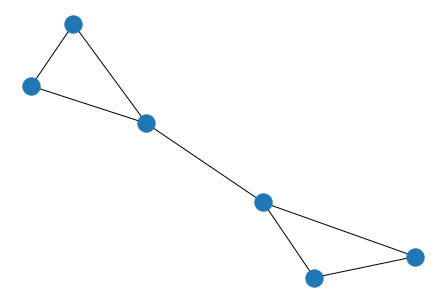

In [14]:
# Will place nodes automatically
nx.draw(network1)


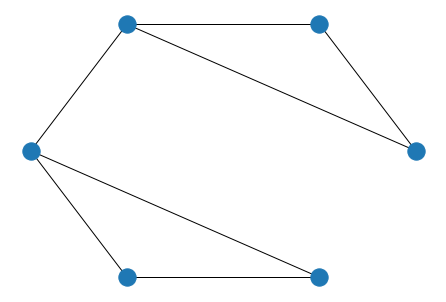

In [15]:
# Will place the nodes in a circular pattern
nx.draw_circular(network1)


Using the function `draw_netowrkx()` we can specify 
more properties to tune the network visualization. 
Below you see a couple of different options for customizing the visualization. 
Type `help(nx.draw_networkx)` for more options or test modifying some of these in the notebook.

In the network below, we have the names of nodes on the figure as well, 
the colour of the node reflects the community, 
the weight of the edge is in the width of the edge, 
the size of the node is the colour of the strength.


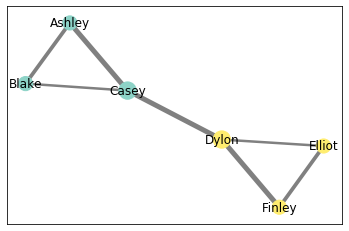

In [16]:
# Get the label information from the network1 object
labels = nx.get_node_attributes(network1, 'label')
# Get the weights and make it a numpy array (so it can be scaled later)
weights = np.array(list(nx.get_edge_attributes(network1, 'weight').values()))
## More complicated plotting functions
nx.draw_networkx(network1,
                labels=labels,
                node_size=network1_properties['strength'].values * 500,
                node_color=network1_properties['communities'].values,
                width=weights * 5, 
                edge_color='gray', 
                cmap='Set3')


Feel free to play around with the figure above and see if you can make prettier networks.